# Midterm Project

## Lolyna de la Fuente Ordaz

In [159]:
# Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

### Dataset Selection

In [295]:
# Reading our database
'''Database taken from https://www.kaggle.com/datasets/vikasukani/diabetes-data-set'''
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [296]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


### Data Wrangling and Cleaning

In [297]:
# Checking for null values in the database
print('NaN in columns:')
print(diabetes.isnull().sum(axis = 0))

print('NaN in rows:')
print(diabetes.isnull().sum(axis = 1))

NaN in columns:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
NaN in rows:
0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Length: 2000, dtype: int64


In [298]:
x = diabetes.describe()
x.T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [299]:
# Since we have BMI we add an extra column to categorize if a patient is overweight or not
diabetes['Overweight'] = 0
diabetes.loc[diabetes['BMI'] > 25, 'Overweight'] = 1
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,2,138,62,35,0,33.6,0.127,47,1,1
1,0,84,82,31,125,38.2,0.233,23,0,1
2,0,145,0,0,0,44.2,0.630,31,1,1
3,0,135,68,42,250,42.3,0.365,24,1,1
4,1,139,62,41,480,40.7,0.536,21,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0,1
1996,8,179,72,42,130,32.7,0.719,36,1,1
1997,6,85,78,0,0,31.2,0.382,42,0,1
1998,0,129,110,46,130,67.1,0.319,26,1,1


#### Replacing impossible values with their column mean

In [300]:
glu = diabetes['Glucose'].mean()
diabetes['Glucose'] = diabetes['Glucose'].replace(0, glu)

In [301]:
bp = diabetes['BloodPressure'].mean()
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, bp)

In [302]:
st = diabetes['SkinThickness'].mean()
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, st)

In [303]:
insulin = diabetes['Insulin'].mean()
diabetes['Insulin'] = diabetes['Insulin'].replace(0, insulin)

In [304]:
bmi = diabetes['BMI'].mean()
diabetes['BMI'] = diabetes['BMI'].replace(0, bmi)

In [305]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,2,138.0,62.0000,35.000,80.254,33.6,0.127,47,1,1
1,0,84.0,82.0000,31.000,125.000,38.2,0.233,23,0,1
2,0,145.0,69.1455,20.935,80.254,44.2,0.630,31,1,1
3,0,135.0,68.0000,42.000,250.000,42.3,0.365,24,1,1
4,1,139.0,62.0000,41.000,480.000,40.7,0.536,21,0,1
5,0,173.0,78.0000,32.000,265.000,46.5,1.159,58,0,1
6,4,99.0,72.0000,17.000,80.254,25.6,0.294,28,0,1
7,8,194.0,80.0000,20.935,80.254,26.1,0.551,67,0,1
8,2,83.0,65.0000,28.000,66.000,36.8,0.629,24,0,1
9,2,89.0,90.0000,30.000,80.254,33.5,0.292,42,0,1


### Descriptive Statistics

In [306]:
x = diabetes.describe()
x.T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.970186,30.533180,44.000,99.000,118.000,141.000,199.00
BloodPressure,2000.0,72.257047,11.968614,24.000,64.000,72.000,80.000,122.00
SkinThickness,2000.0,26.932878,9.884003,7.000,20.935,23.000,32.000,110.00
Insulin,2000.0,118.615412,88.366170,14.000,80.254,80.254,130.000,744.00
BMI,2000.0,32.643702,7.190337,18.200,27.600,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.470930,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.090500,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000,1.000,1.00
Overweight,2000.0,0.847000,0.360078,0.000,1.000,1.000,1.000,1.00


### Data Visualization

#### Boxplot

<AxesSubplot:>

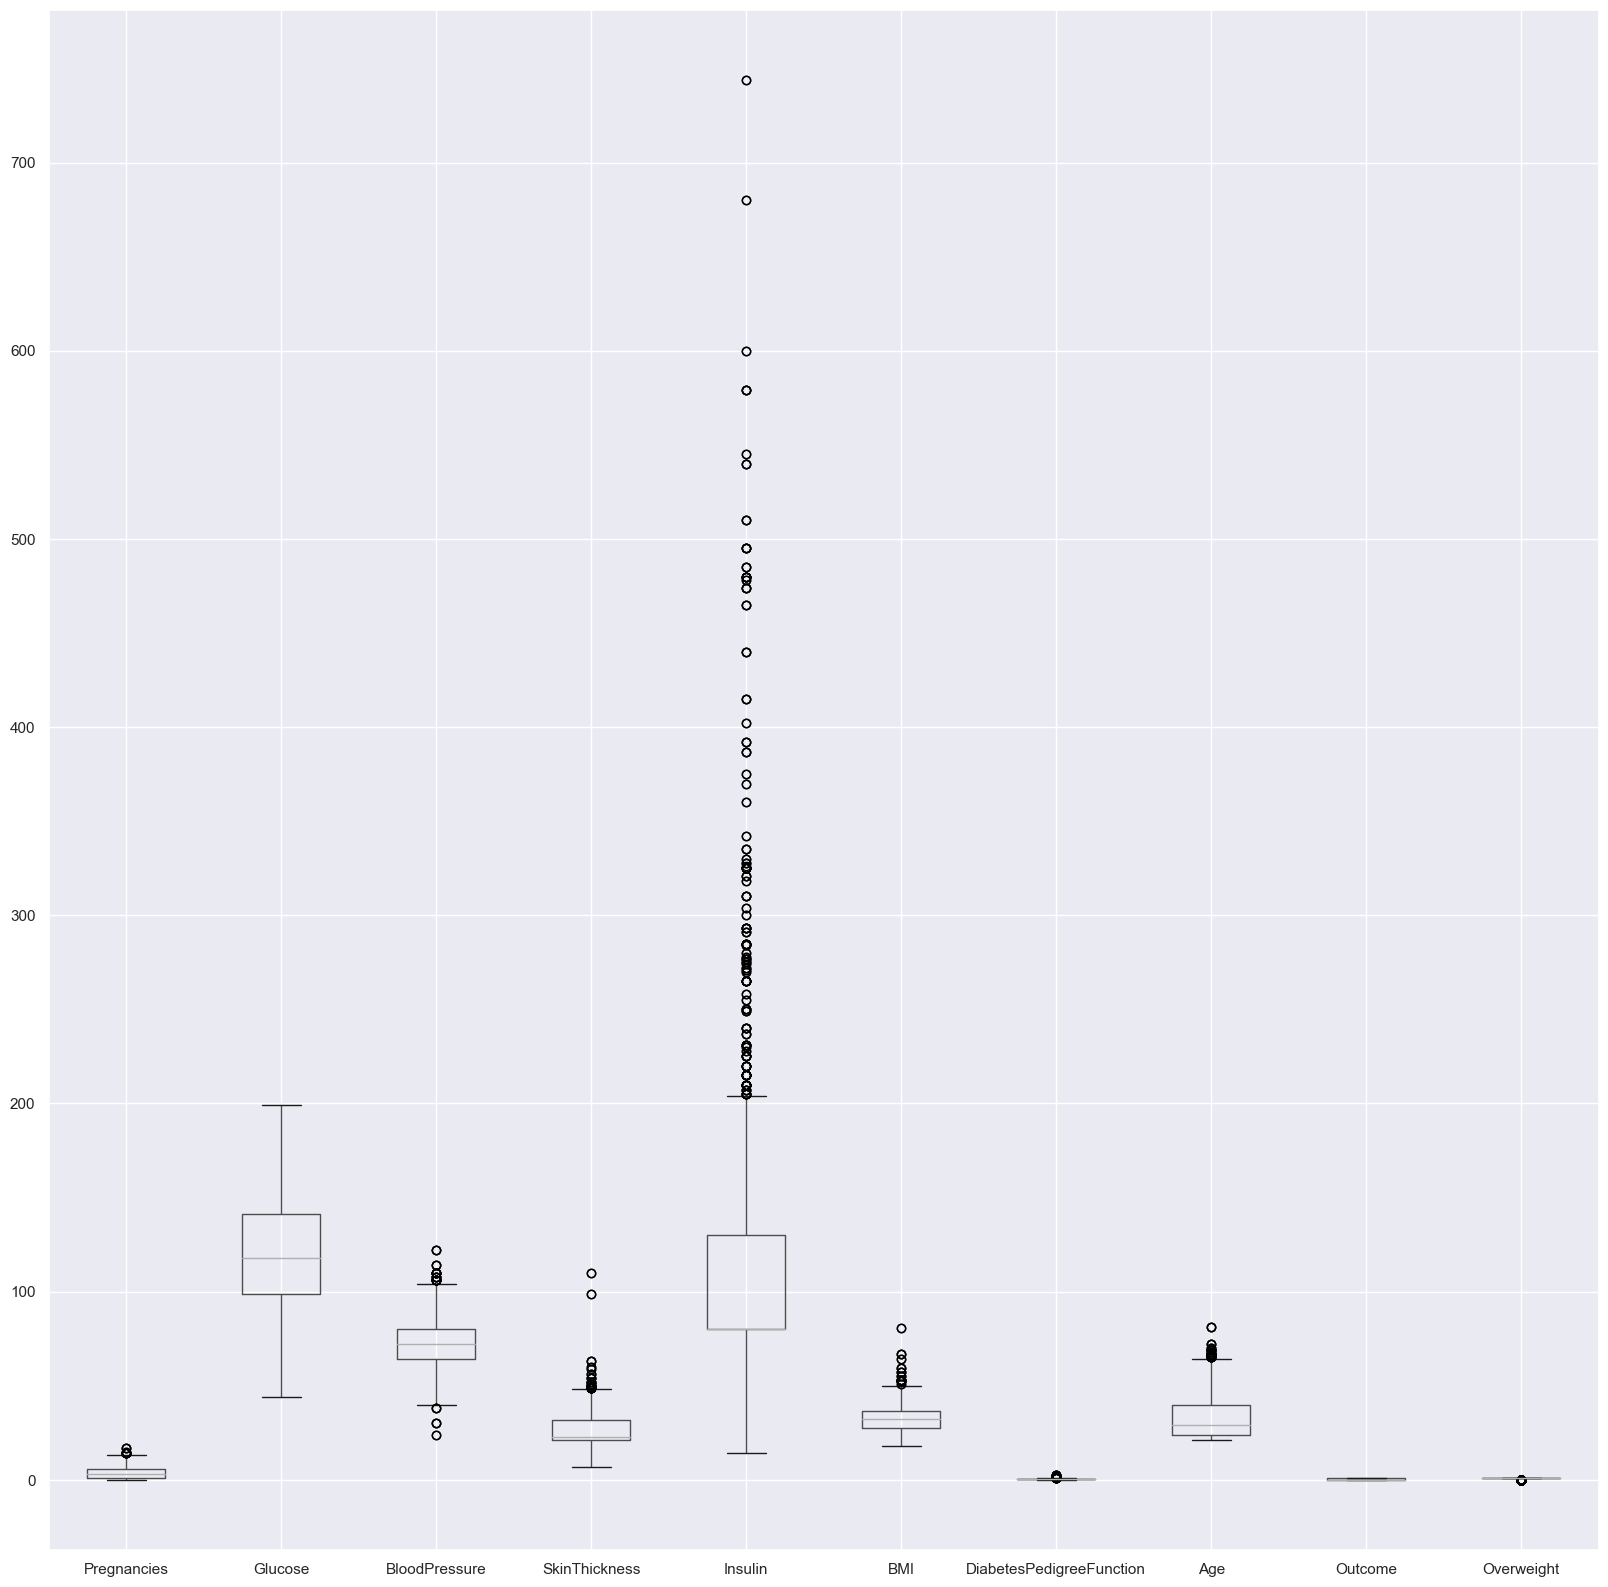

In [307]:
diabetes.boxplot(figsize=(20,20))

##### Finding outliers

In [308]:
# Since the visualization presented a lot of outliers, I decided to see how many were there
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1
((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).sum()

# After this I tried to discretize the function, but the values were really off and deleting them wasn't an option due 
# to the small size of the dataset, so I decided to leave them

Pregnancies                  12
Glucose                       0
BloodPressure                35
SkinThickness                43
Insulin                     220
BMI                          30
DiabetesPedigreeFunction     68
Age                          48
Outcome                       0
Overweight                  306
dtype: int64

#### Linear Regressions

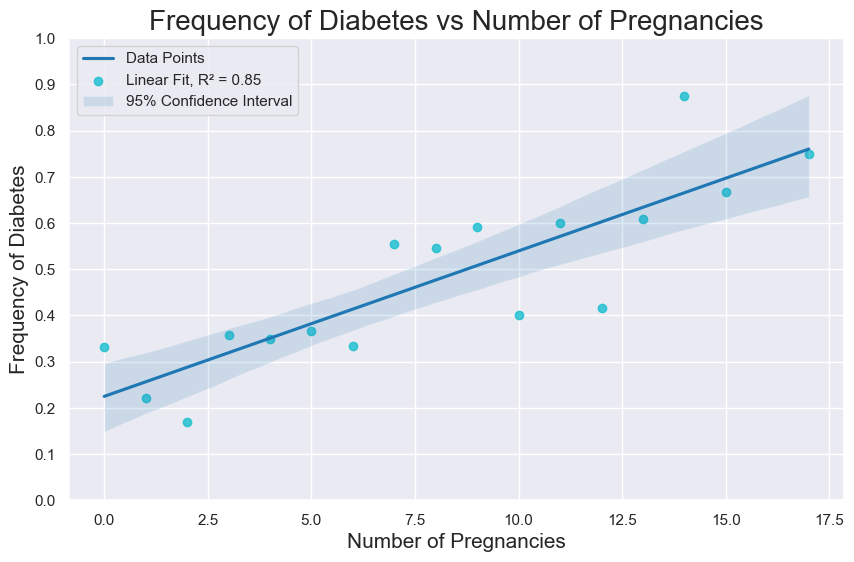

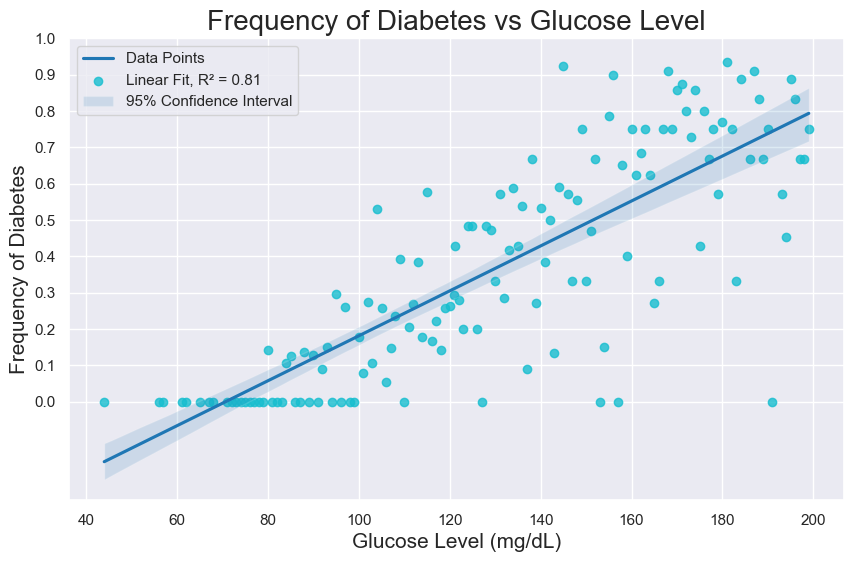

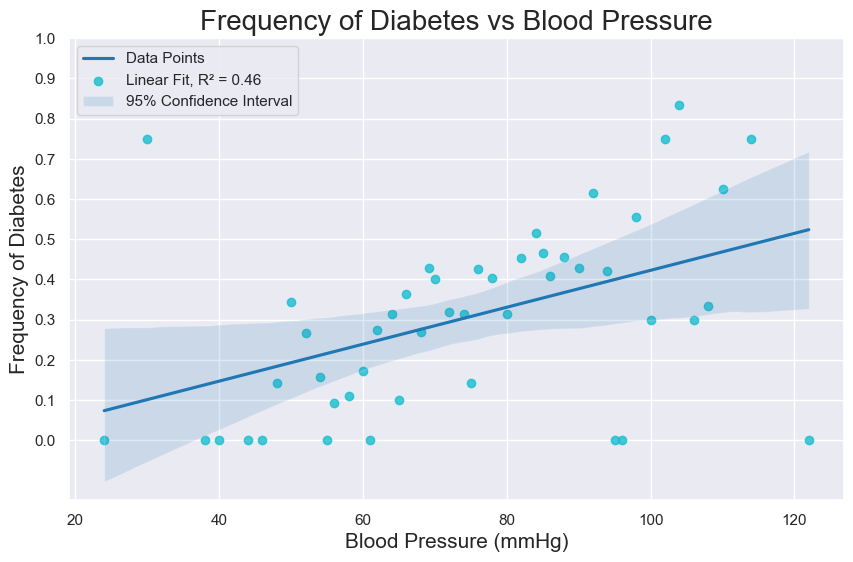

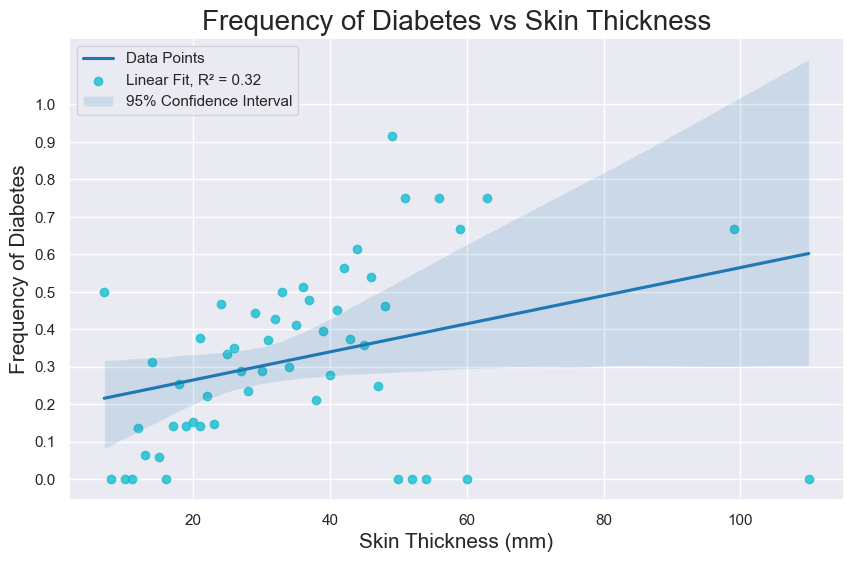

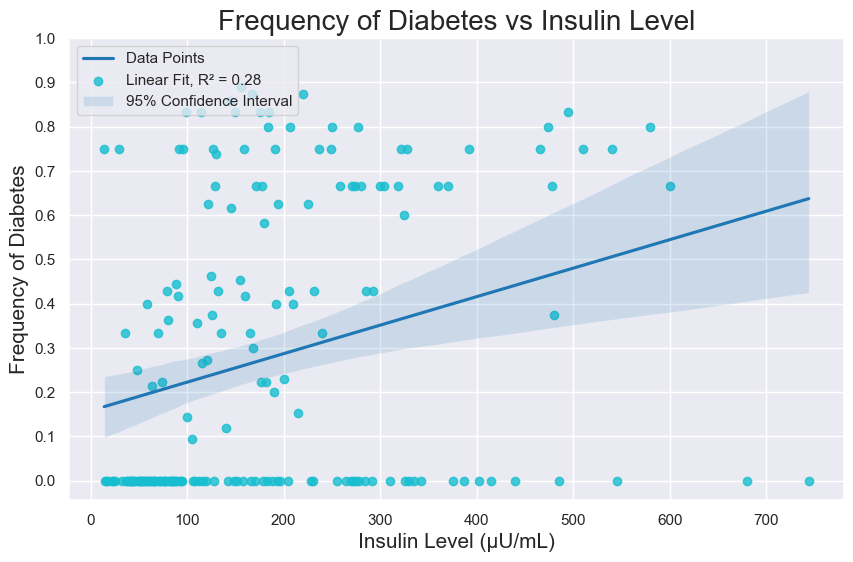

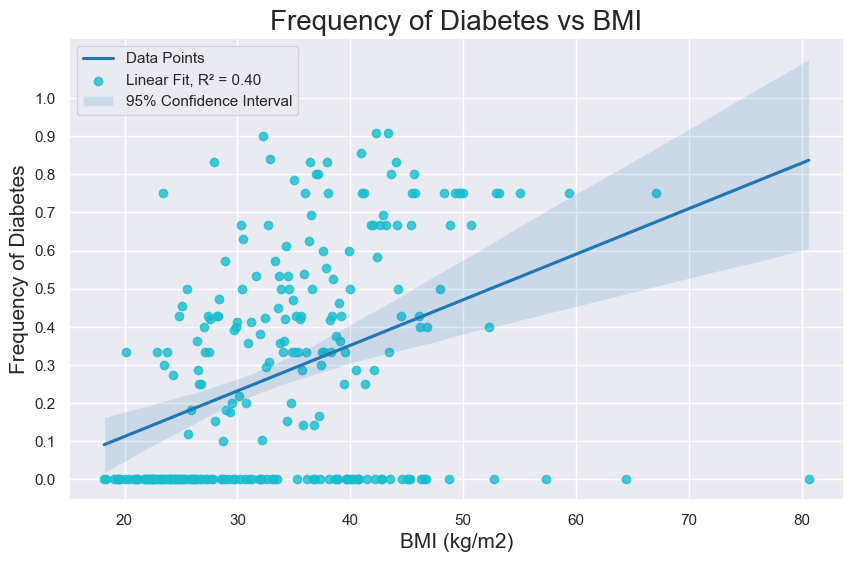

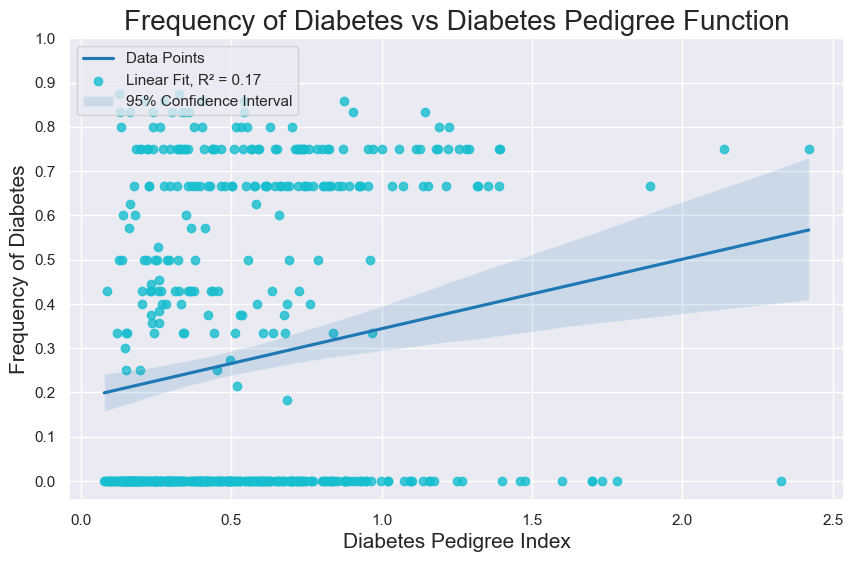

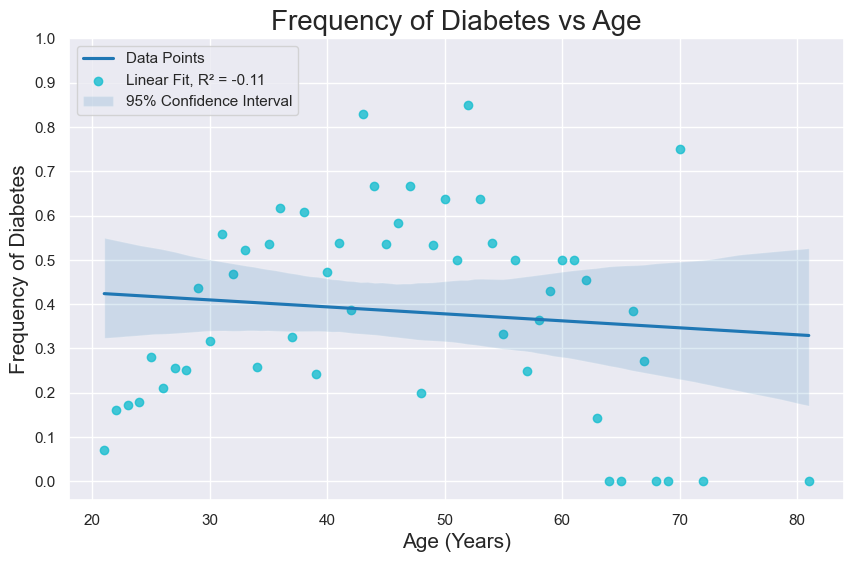

In [319]:
cols = 0

while cols < 8: # while loop to graph all columns
    counterDict = dict()
    for row in range(len(diabetes)): # we only take the patients with an outcome = 1 and iterate them into a dict
        if diabetes.loc[row][cols] not in counterDict:
            counterDict[diabetes.loc[row][cols]] = [0,1]
        
        if diabetes.loc[row]['Outcome'] == 1:
            counterDict[diabetes.loc[row][cols]][0] += 1
            counterDict[diabetes.loc[row][cols]][1] += 1
        
        else: counterDict[diabetes.loc[row][cols]][1] += 1 
    
    # Stores unique relative frequencies
    freqDiabetic = []
    for value in counterDict.values():
        freqDiabetic.append(value[0]/value[1])
    
    # Stores dictionary keys in a list
    dictKeys = [float(x) for x in counterDict.keys()]
    
    # Changes format of dictionary into two column df so that sns.regplot function can use the data
    twoColArray = []
    for i in range(len(dictKeys)):
        twoColArray.append([dictKeys[i], freqDiabetic[i]])
    twoColDf = pd.DataFrame(twoColArray, columns= ['VarIncrements', 'RelativeDiabetesFreq'])
    
    #Graphs
    fig = plt.figure(figsize = (10,6))
    ax1 = plt.axes()
    
    sns.regplot(x="VarIncrements", y="RelativeDiabetesFreq", data = twoColDf, color = 'darkblue', scatter_kws={"color": '#17becf'}, line_kws={"color": 'tab:blue'})
    
    correlationCoef = np.corrcoef(x = dictKeys, y = freqDiabetic)
    ax1.legend(["Data Points", f"Linear Fit, {'R'}\u00b2 = {correlationCoef[0,1]:.2f}","95% Confidence Interval" ], loc = 'upper left')
    ax1.set_ylabel(f"Frequency of Diabetes", fontsize = 15)
    ax1.set_yticks(np.arange(0,1.1,.1))
    
    #Pregnancies
    if diabetes.columns[cols] == 'Pregnancies':
        ax1.set_xlabel(f"Number of Pregnancies", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs Number of Pregnancies", fontsize = 20)

    #Glucose
    if diabetes.columns[cols] == 'Glucose':
        ax1.set_xlabel(f"Glucose Level (mg/dL)", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs Glucose Level", fontsize = 20)

    #BloodPressure
    if diabetes.columns[cols] == 'BloodPressure':
        ax1.set_xlabel(f"Blood Pressure (mmHg)", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs Blood Pressure", fontsize = 20)

    #SkinThickness
    if diabetes.columns[cols] == 'SkinThickness':
        ax1.set_xlabel(f"Skin Thickness (mm)", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs Skin Thickness", fontsize = 20)

    #Insulin
    if diabetes.columns[cols] == 'Insulin':
        ax1.set_xlabel(f"Insulin Level (µU/mL)", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs Insulin Level", fontsize = 20)

    #BMI
    if diabetes.columns[cols] == 'BMI':
        ax1.set_xlabel(f"BMI (kg/m2)", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs BMI", fontsize = 20)

    #DiabetesPedigreeFunction
    if diabetes.columns[cols] == 'DiabetesPedigreeFunction':
        ax1.set_xlabel(f"Diabetes Pedigree Index", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs Diabetes Pedigree Function", fontsize = 20)

    #Age
    if diabetes.columns[cols] == 'Age':
        ax1.set_xlabel(f"Age (Years)", fontsize = 15)
        ax1.set_title(f"Frequency of Diabetes vs Age", fontsize = 20)
    
    cols += 1

#### BarPlot

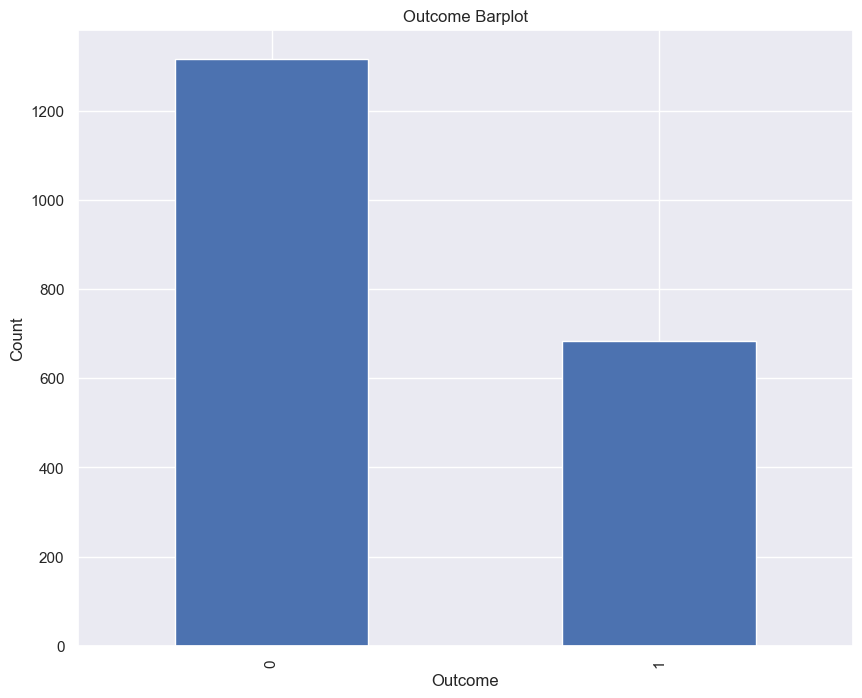

In [310]:
x = diabetes['Outcome'].value_counts()
x.plot(kind='bar',figsize=(10,8))

plt.title("Outcome Barplot")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


#### Histogram

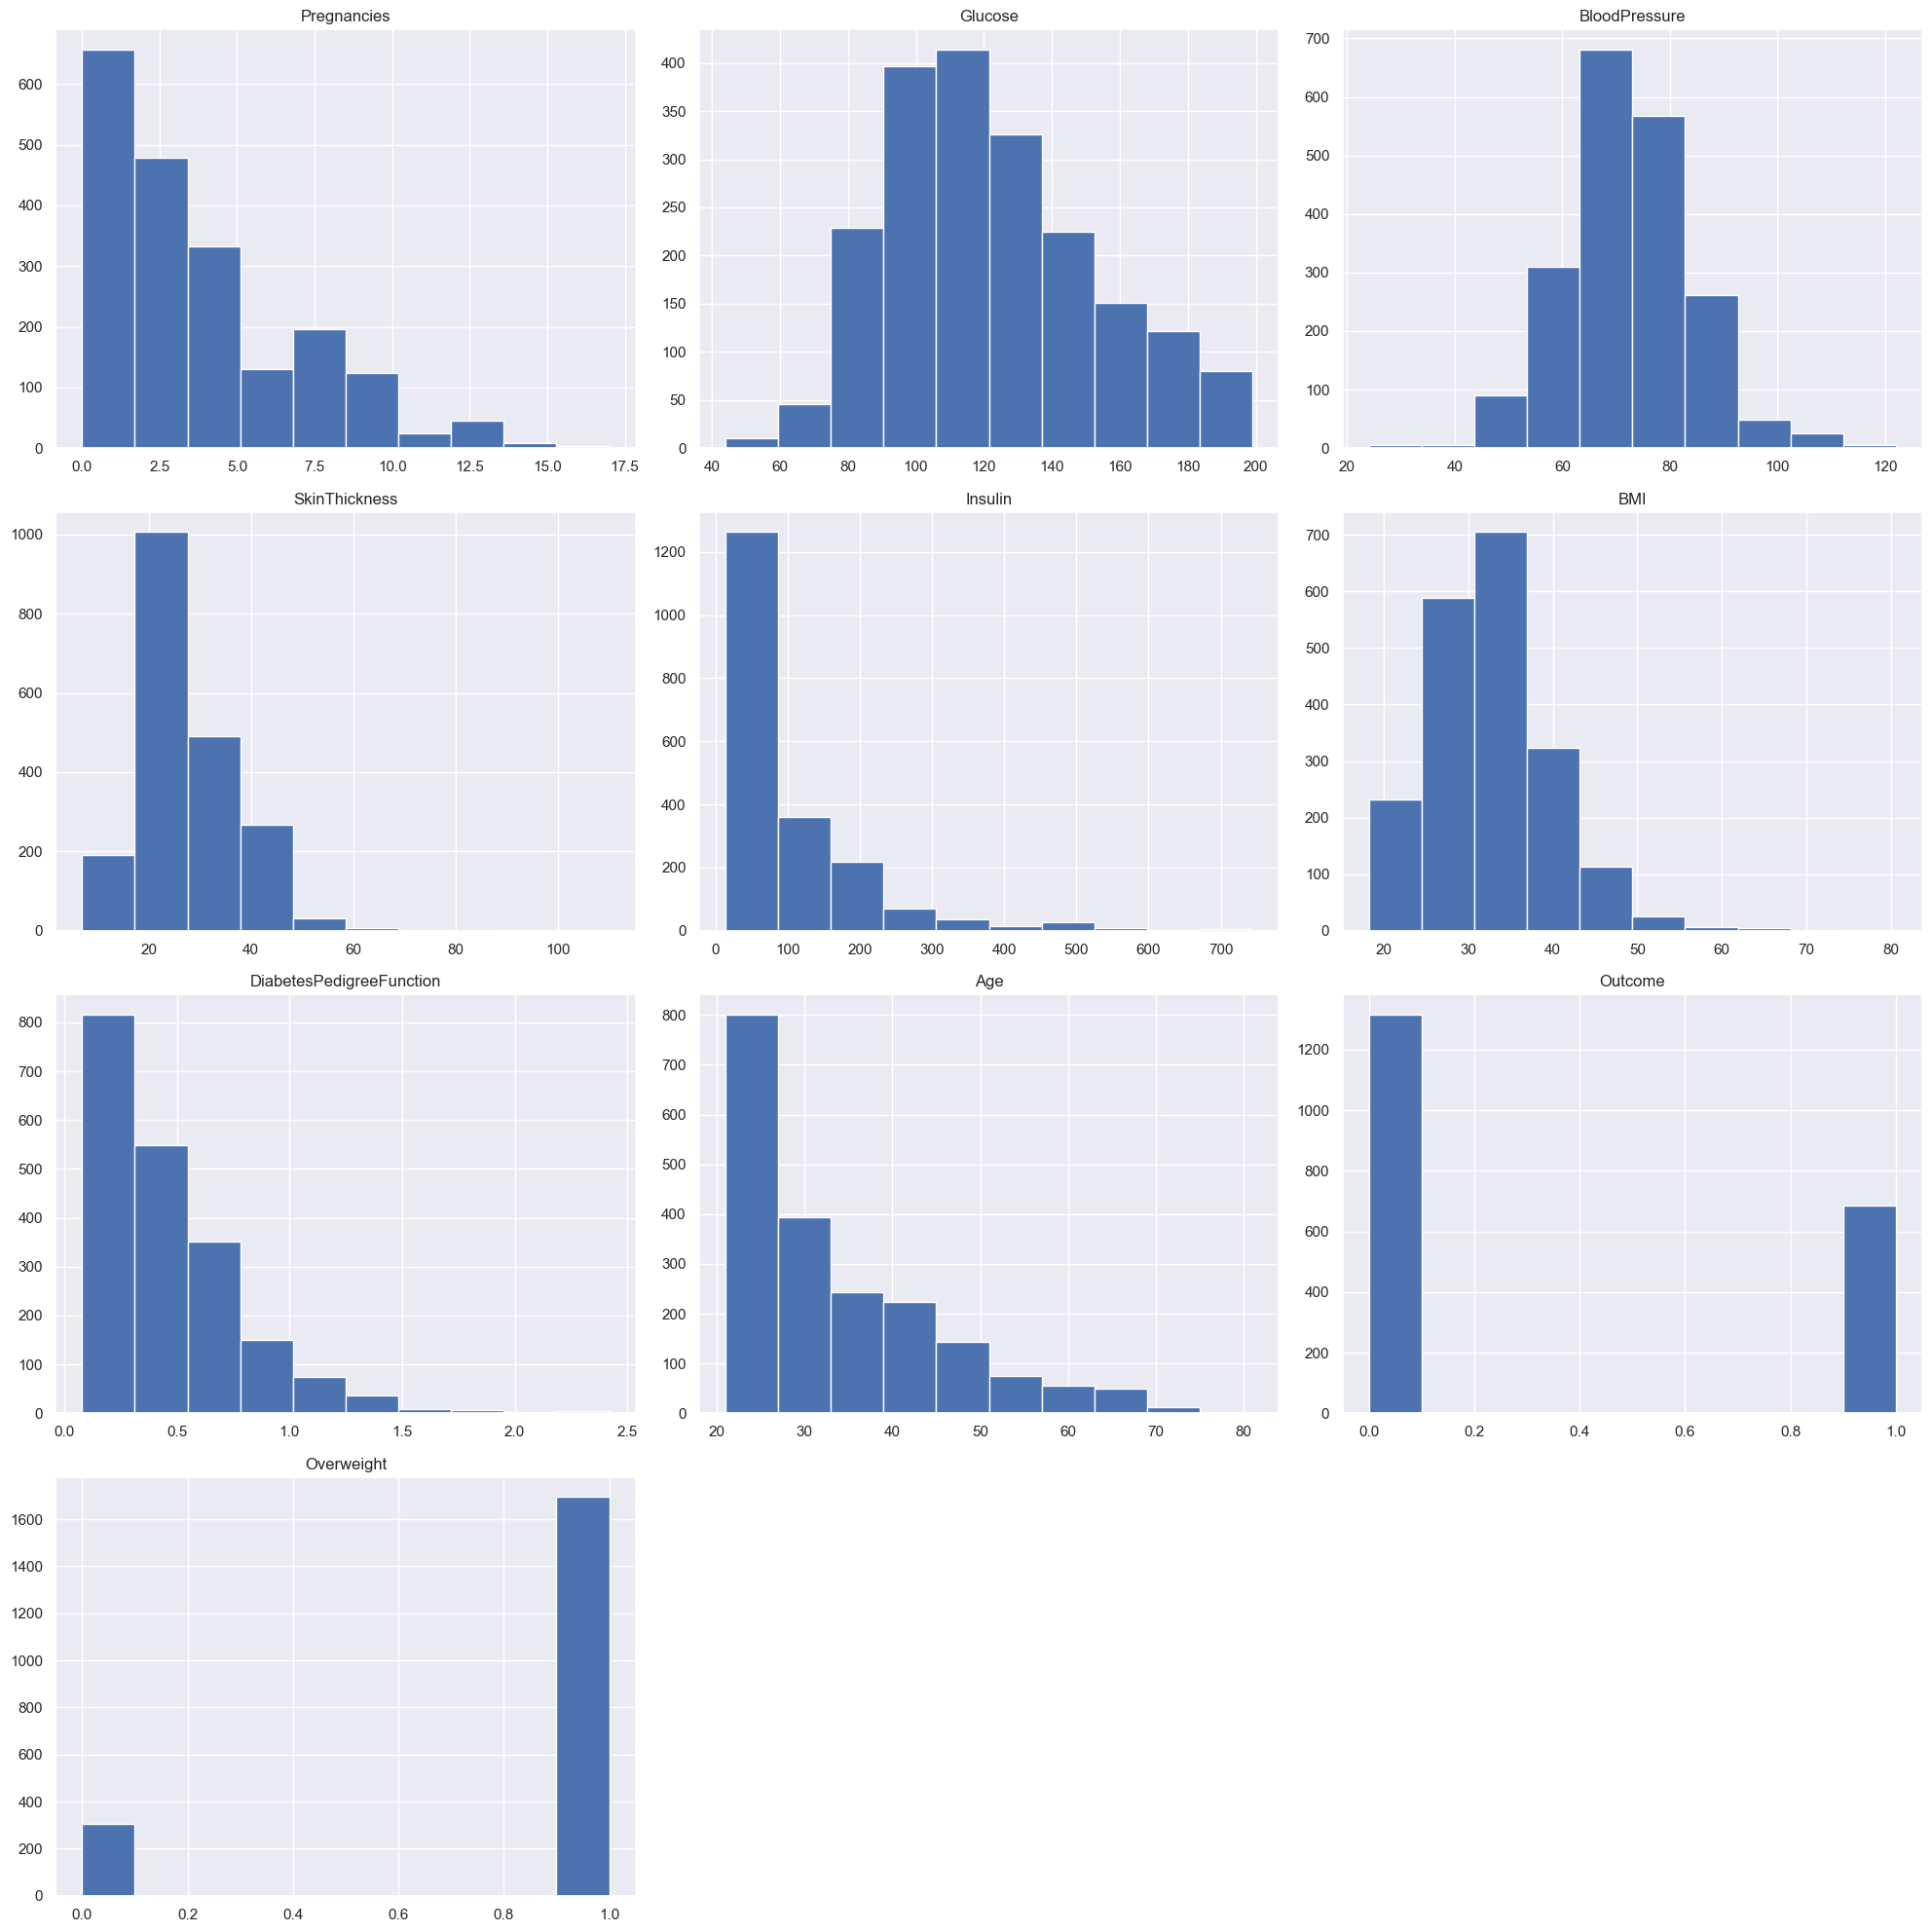

In [311]:
#Histogram for each variable
hist=diabetes.hist(figsize=(20,20))
plt.tight_layout()

#### Scatter Plots

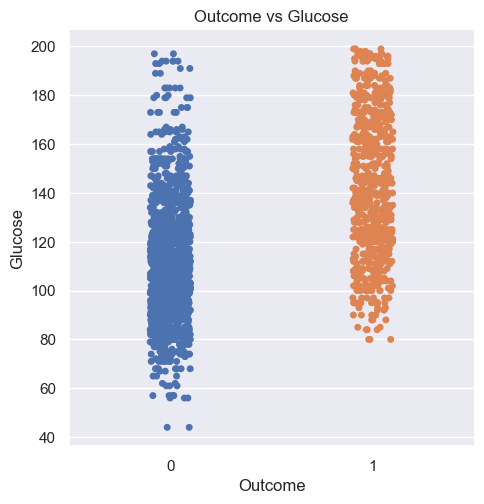

In [312]:
sns.catplot(data=diabetes, x="Outcome", y='Glucose', hue='Outcome')

plt.title("Outcome vs Glucose")
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.show()

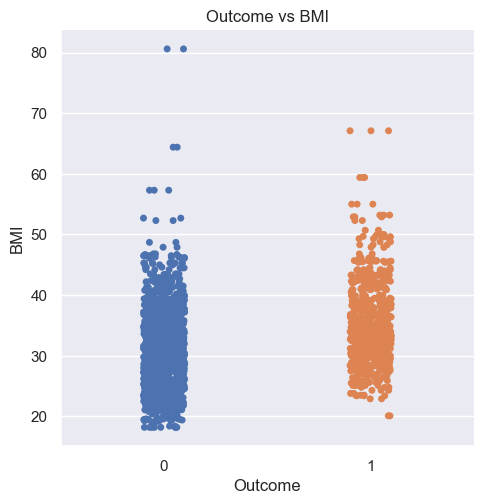

In [313]:
sns.catplot(data=diabetes, x="Outcome", y='BMI', hue='Outcome')

plt.title("Outcome vs BMI")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()


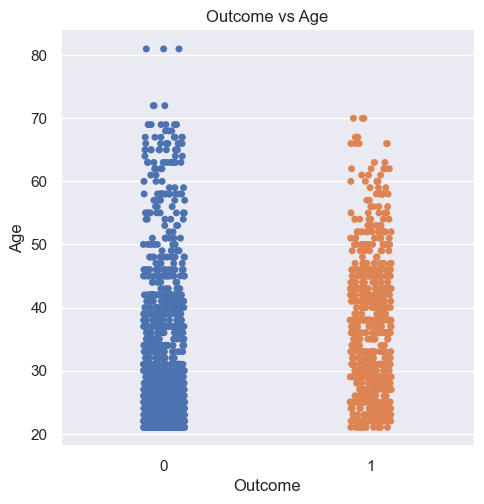

In [314]:
sns.catplot(data=diabetes, x="Outcome", y='Age', hue='Outcome')

plt.title("Outcome vs Age")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()


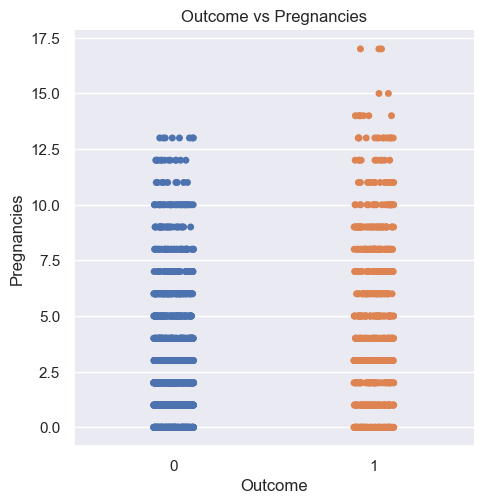

In [315]:
sns.catplot(data=diabetes, x="Outcome", y='Pregnancies', hue='Outcome')

plt.title("Outcome vs Pregnancies")
plt.xlabel("Outcome")
plt.ylabel("Pregnancies")
plt.show()


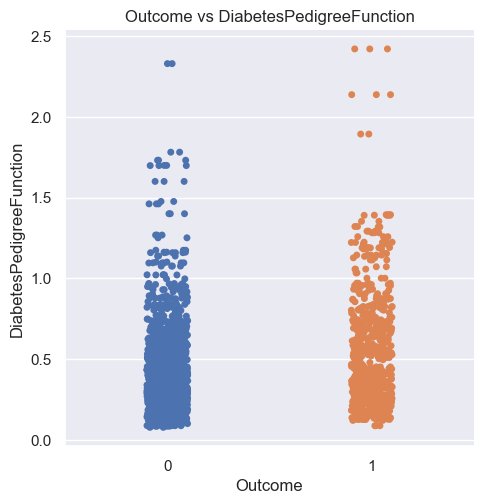

In [316]:
sns.catplot(data=diabetes, x="Outcome", y='DiabetesPedigreeFunction', hue='Outcome')

plt.title("Outcome vs DiabetesPedigreeFunction")
plt.xlabel("Outcome")
plt.ylabel("DiabetesPedigreeFunction")
plt.show()

#### Correlation HeatMap

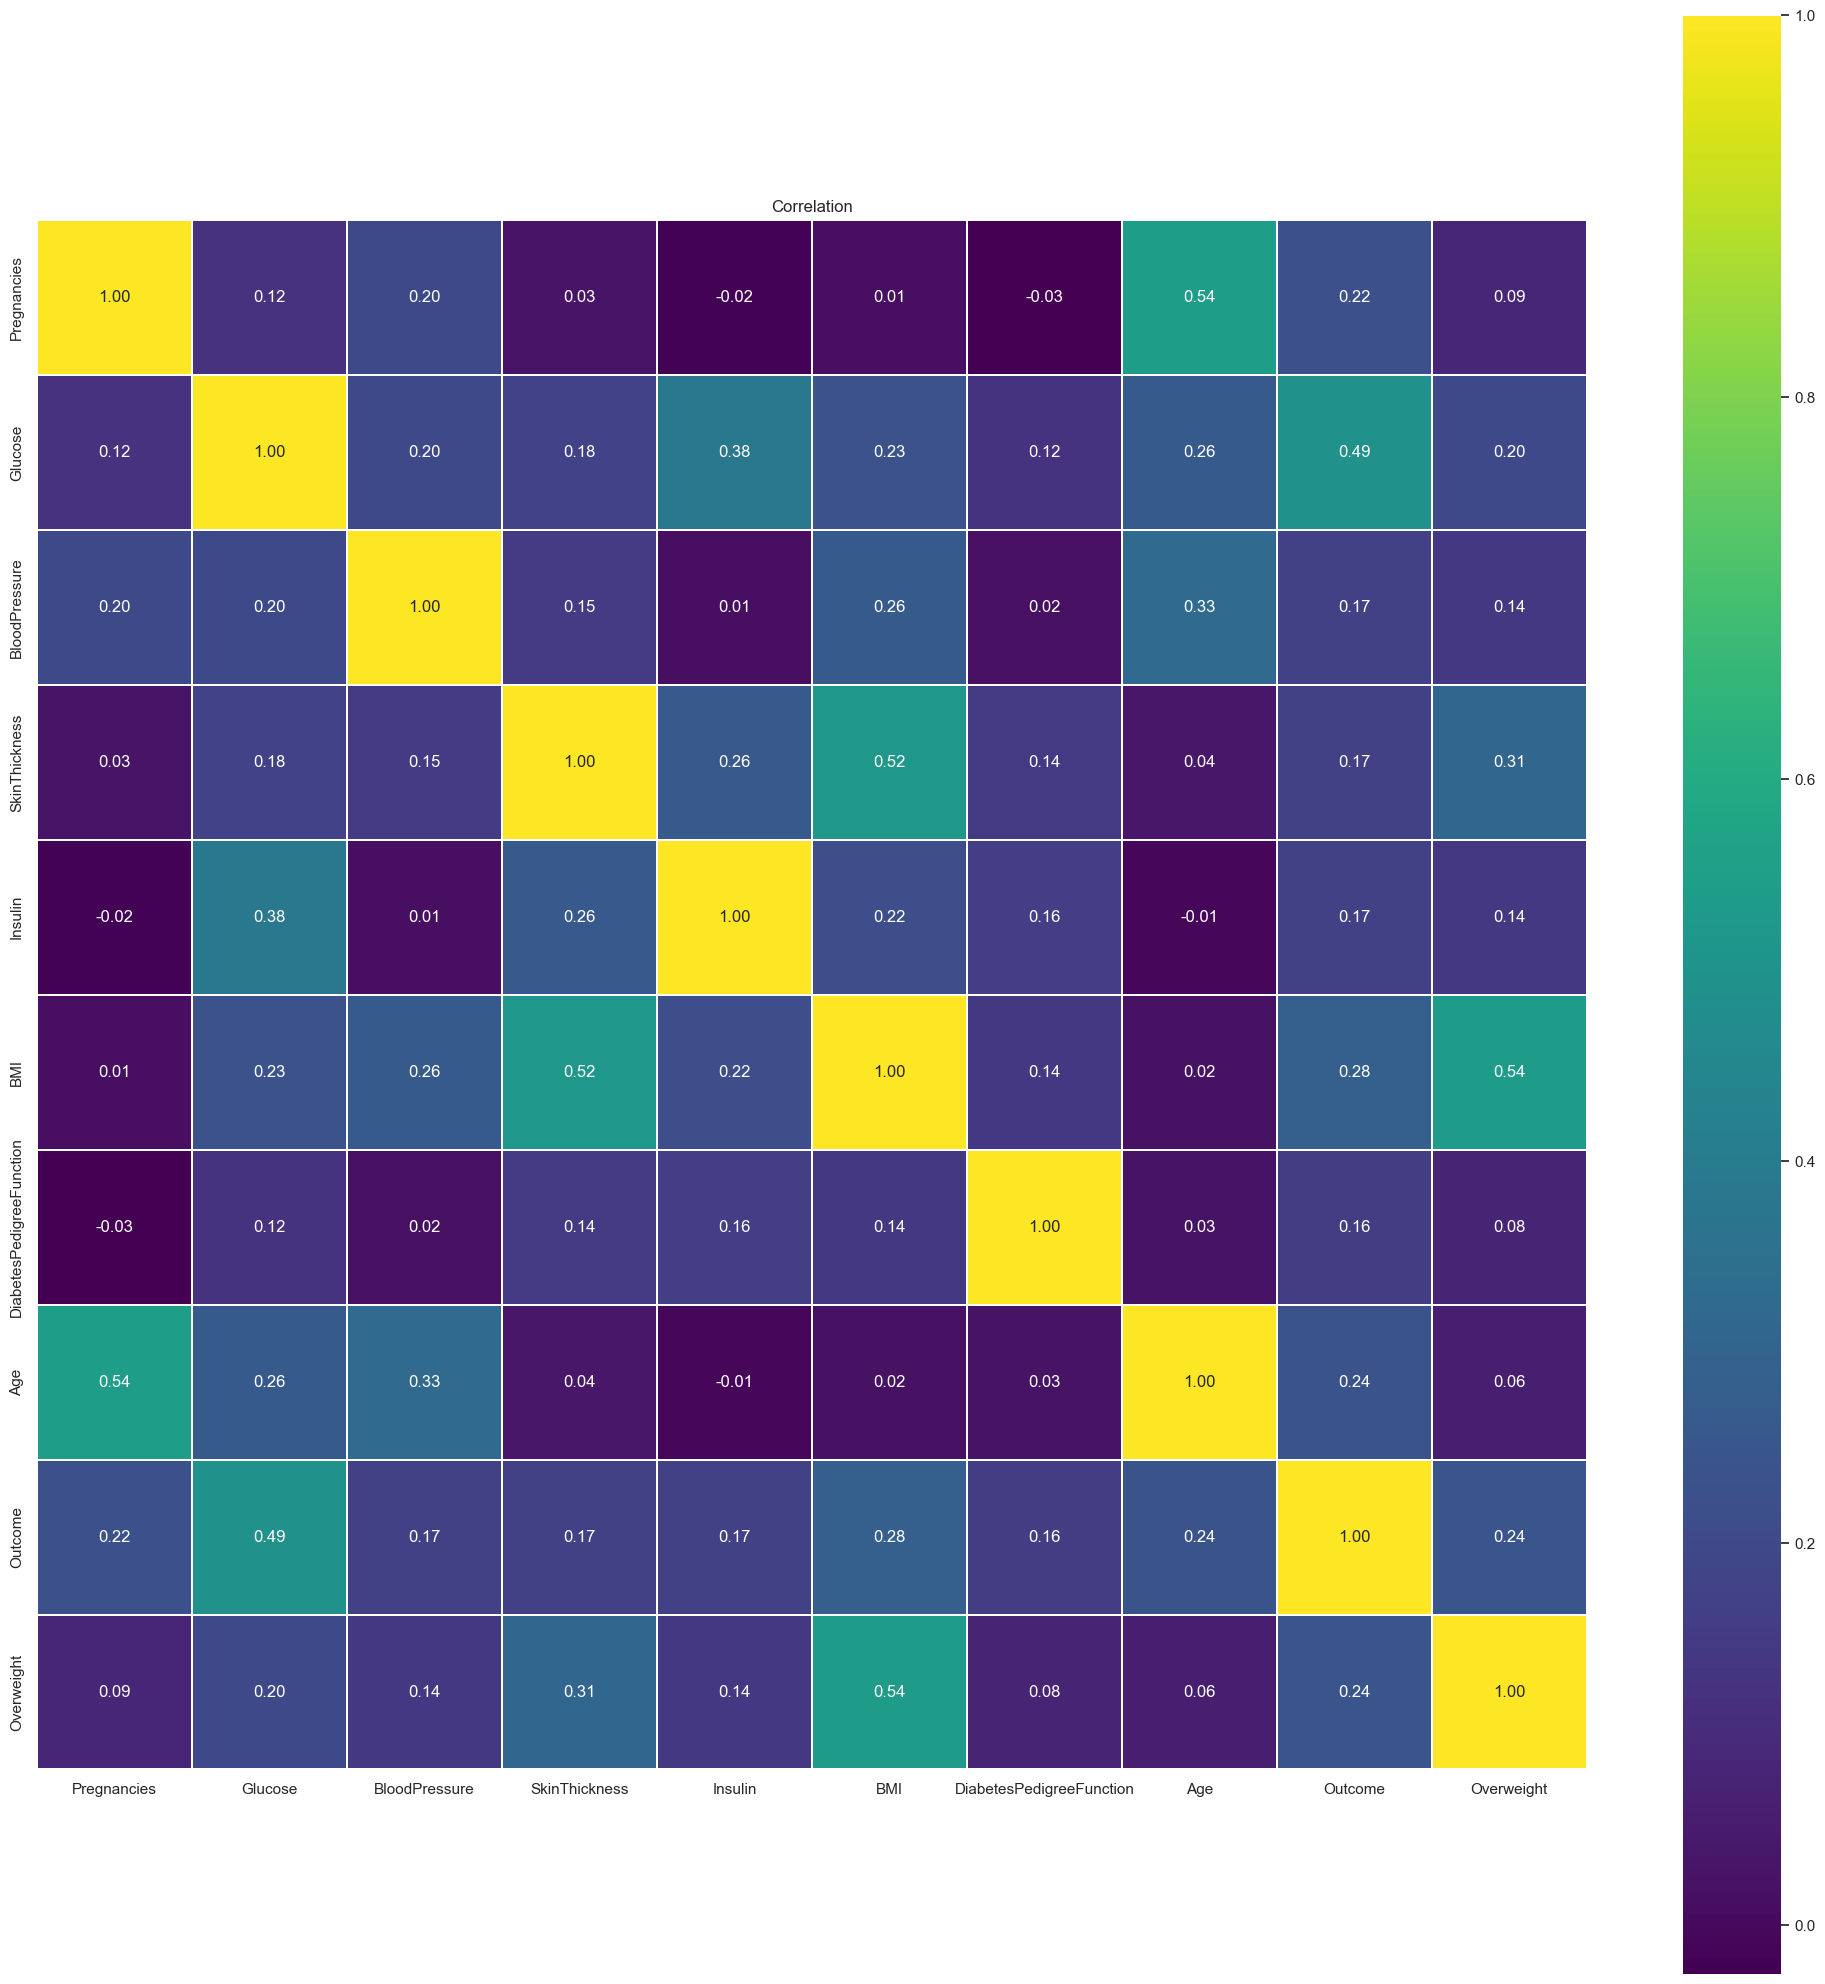

In [317]:
plt.figure(figsize=(20,20))
sns.heatmap(diabetes.corr(), annot= True, fmt= '.2f', linewidths= 0.2, square = True, cmap='viridis').set_title('Correlation')
plt.tight_layout()
plt.show()

In [318]:
#Numerical Data from the HeatMap
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
Pregnancies,1.000000,0.121569,0.199471,0.028116,-0.020319,0.011439,-0.025453,0.539457,0.224437,0.085419
Glucose,0.121569,1.000000,0.200509,0.175337,0.384706,0.233228,0.124176,0.259853,0.487977,0.199544
BloodPressure,0.199471,0.200509,1.000000,0.154736,0.012714,0.259445,0.015216,0.325490,0.171844,0.138976
SkinThickness,0.028116,0.175337,0.154736,1.000000,0.257060,0.520245,0.143700,0.035946,0.170856,0.309495
Insulin,-0.020319,0.384706,0.012714,0.257060,1.000000,0.217047,0.161557,-0.009007,0.171339,0.140264
BMI,0.011439,0.233228,0.259445,0.520245,0.217047,1.000000,0.142019,0.018815,0.282615,0.537075
DiabetesPedigreeFunction,-0.025453,0.124176,0.015216,0.143700,0.161557,0.142019,1.000000,0.026569,0.155459,0.076918
Age,0.539457,0.259853,0.325490,0.035946,-0.009007,0.018815,0.026569,1.000000,0.236509,0.058782
Outcome,0.224437,0.487977,0.171844,0.170856,0.171339,0.282615,0.155459,0.236509,1.000000,0.244925
Overweight,0.085419,0.199544,0.138976,0.309495,0.140264,0.537075,0.076918,0.058782,0.244925,1.000000
